In [7]:
using Plots
using DataFrames
using CSV
using LaTeXStrings
using Clapeyron

In [8]:
model_mix = SAFTgammaMie([("MEA", ["NH2"=>1, "CH2"=>1, "CH2OH"=>1]), ("sulfur dioxide", ["SO2"=>1])];
         userlocations=(
        Mw = [16.02, 14.03, 31.03, 64.1],
        #=
        epsilon = [284.78 348.39 528.21 242.45;
                   348.39 473.39 423.17 335.24;
                   528.21 423.17 407.22 310.37;
                   242.45 335.24 310.37 237.54],
        =#
        epsilon = [284.78, 473.39, 407.22, 237.54],
        sigma = [4.8801, 3.2477, 3.4054, 3.1605],
        lambda_a = [6.000, 6.000, 6.000, 6.000],
        lambda_r = [10.254, 19.871, 22.699, 15.213],
        vst = [1.0, 1.0, 2.0, 3.0],
        S = [0.79675, 0.22932, 0.58538, 0.62547],
        n_e=[1, 0, 2, 0],
        n_H=[2, 0, 1, 0],
        epsilon_assoc = Dict((("NH2","e"),("NH2","H")) => 1070.80,
                             (("NH2","e"),("CH2OH","H")) => 2403.78,
                             (("CH2OH","e"),("CH2OH","H")) => 2097.90,
                             (("CH2OH","e"),("NH2","H")) => 629.88),
        bondvol = Dict((("NH2","e"),("NH2","H")) => 95.225e-30,
                             (("NH2","e"),("CH2OH","H")) => 26.192e-30,
                             (("CH2OH","e"),("CH2OH","H")) => 62.309e-30,
                             (("CH2OH","e"),("NH2","H")) => 346.08e-30)
        )
)

SAFTgammaMie{BasicIdeal} with 2 components:
 "MEA": "NH2" => 1, "CH2" => 1, "CH2OH" => 1
 "sulfur dioxide": "SO2" => 1
Group Type: SAFTgammaMie
Contains parameters: segment, shapefactor, lambda_a, lambda_r, sigma, epsilon, epsilon_assoc, bondvol

### Plotting

In [14]:
iter = Int(100)
T_isotherm = 500

global bub_curve,dew_curve,iter

bub_curve = zeros(1, iter+1, 2)
dew_curve = zeros(1, iter+1, 2)

(x,n,G) = tp_flash(model_mix, 8e5, T_isotherm, [0.5,0.5], RRTPFlash(equilibrium=:vle,x0=[0.5,0.5], y0=[0.5,0.5]))
y0=x[2,:]

for i_x in 1:iter+1
    local dummy_bub, dummy_dew, x
    x = 0.0
    x = x + (i_x-1)*1.0/float(iter)
    dummy_bub = bubble_pressure(model_mix,T_isotherm, [x,1-x], ChemPotBubblePressure(y0=y0))
    bub_curve[1,i_x,1] = dummy_bub[1]
    bub_curve[1,i_x,2] = dummy_bub[4][1]
    dummy_dew = dew_pressure(model_mix,T_isotherm,[x,1-x])
    dew_curve[1,i_x,1] = dummy_dew[1]
    dew_curve[1,i_x,2] = dummy_dew[4][1]
    
end 

LoadError: LinearAlgebra.SingularException(4)

In [33]:
iter = 100
T_isotherm = 300
x = LinRange(0, 1, iter+1)


global bub_curve,dew_curve,iter

bub_curve = zeros(1, iter+1, 2)
dew_curve = zeros(1, iter+1, 2)

for i_x in 1:iter+1
    local dummy_bub, dummy_dew, dummy_x
    dummy_bub = bubble_pressure(model_mix,T_isotherm, [x[i_x],1-x[i_x]])
    bub_curve[1,i_x,1] = dummy_bub[1]
    bub_curve[1,i_x,2] = dummy_bub[4][1]
    dummy_dew = dew_pressure(model_mix,T_isotherm,[x[i_x],1-x[i_x]])
    dew_curve[1,i_x,1] = dummy_dew[1]
    dew_curve[1,i_x,2] = dummy_dew[4][1]
    
end 

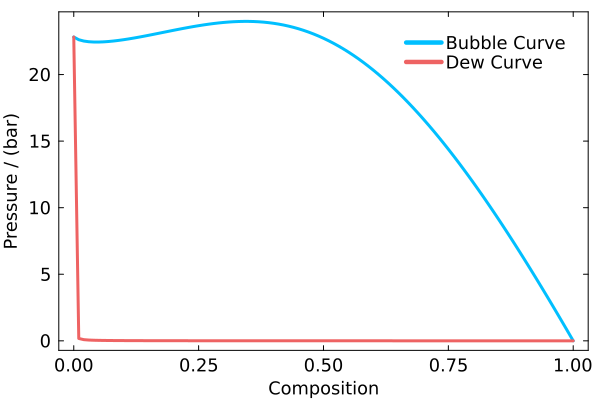

In [54]:
plt = plot(grid = :off, 
           framestyle = :box, 
           foreground_color_legend = nothing, 
           legend_font = font(12),
           xtickfont = font(12),
           ytickfont = font(12))

plot!(plt, x, (bub_curve[:, :, 1] ./ 1e5)', 
      seriestype = :scatter, 
      color = "deepskyblue1", 
      markerstrokecolor = "black", 
      line = (:path, 3), 
      label = "Bubble Curve")

plot!(plt, x, (dew_curve[:, :, 1] ./ 1e5)', 
      seriestype = :scatter, 
      color = "indianred2", 
      markerstrokecolor = "black", 
      line = (:path, 3), 
      label = "Dew Curve")

xlabel!(plt, "Composition", yguidefontsize=12)
ylabel!(plt, "Pressure / (bar)", xguidefontsize=12)